# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

# Importing Libraries: 
   We start by importing the necessary libraries for our data analysis and machine learning tasks.


In [2]:
#importing the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score


# Data Exploaration:
Reading the data into a data frame named "data" and checking the first few columns of data to get the idea of data.


In [3]:
# Read the CSV file into a DataFrame
data = pd.read_csv('Mobile_Price_Data.csv')

In [4]:
# Checking the shape of the dataset
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1


# Data Cleaning:

Checking the **null values** and removing them to get clean data without null values so we can have more accurate model predictions.
checking the **abnormal instances** using **box plot** and analyzing them. During analyzing the box plots we found that two variables named **fc** and **px_height** had few outliers. we have to remove them so that our data is cleaned and we can improve the robustness and performance of models.By removing outliers, we can ensure that the model focuses on the general patterns in the data rather than being overly influenced by extreme values.

**Removing outliers** using conditions likely aimed to improve the quality of the data before training the classification models. This is especially important for models like KNN and logistic regression, where the presence of outliers can impact the decision boundaries and affect the accuracy of predictions.

Removing outliers for 'fc' values greater than 15.5 and 'px_height' values greater than 1850 could help prevent these extreme values from disproportionately affecting the model's performance as the outliers obsereved in the box plots were out of these ranges so we provided the condition to remove the values that are greater than these values.


In [5]:
# Display the number of Null values in each column
print("Null values in each column:")
print(data.isnull().sum())

Null values in each column:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [6]:
# Remove records where int_memory,m_dep,px_width,ram, three_g is missing
data_clean = data.dropna(subset = ['int_memory','m_dep','px_width','ram','three_g' ])

In [7]:
# Display the number of Null values in each column
print("Null values in each column:")
data_clean.isnull().sum()

Null values in each column:


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

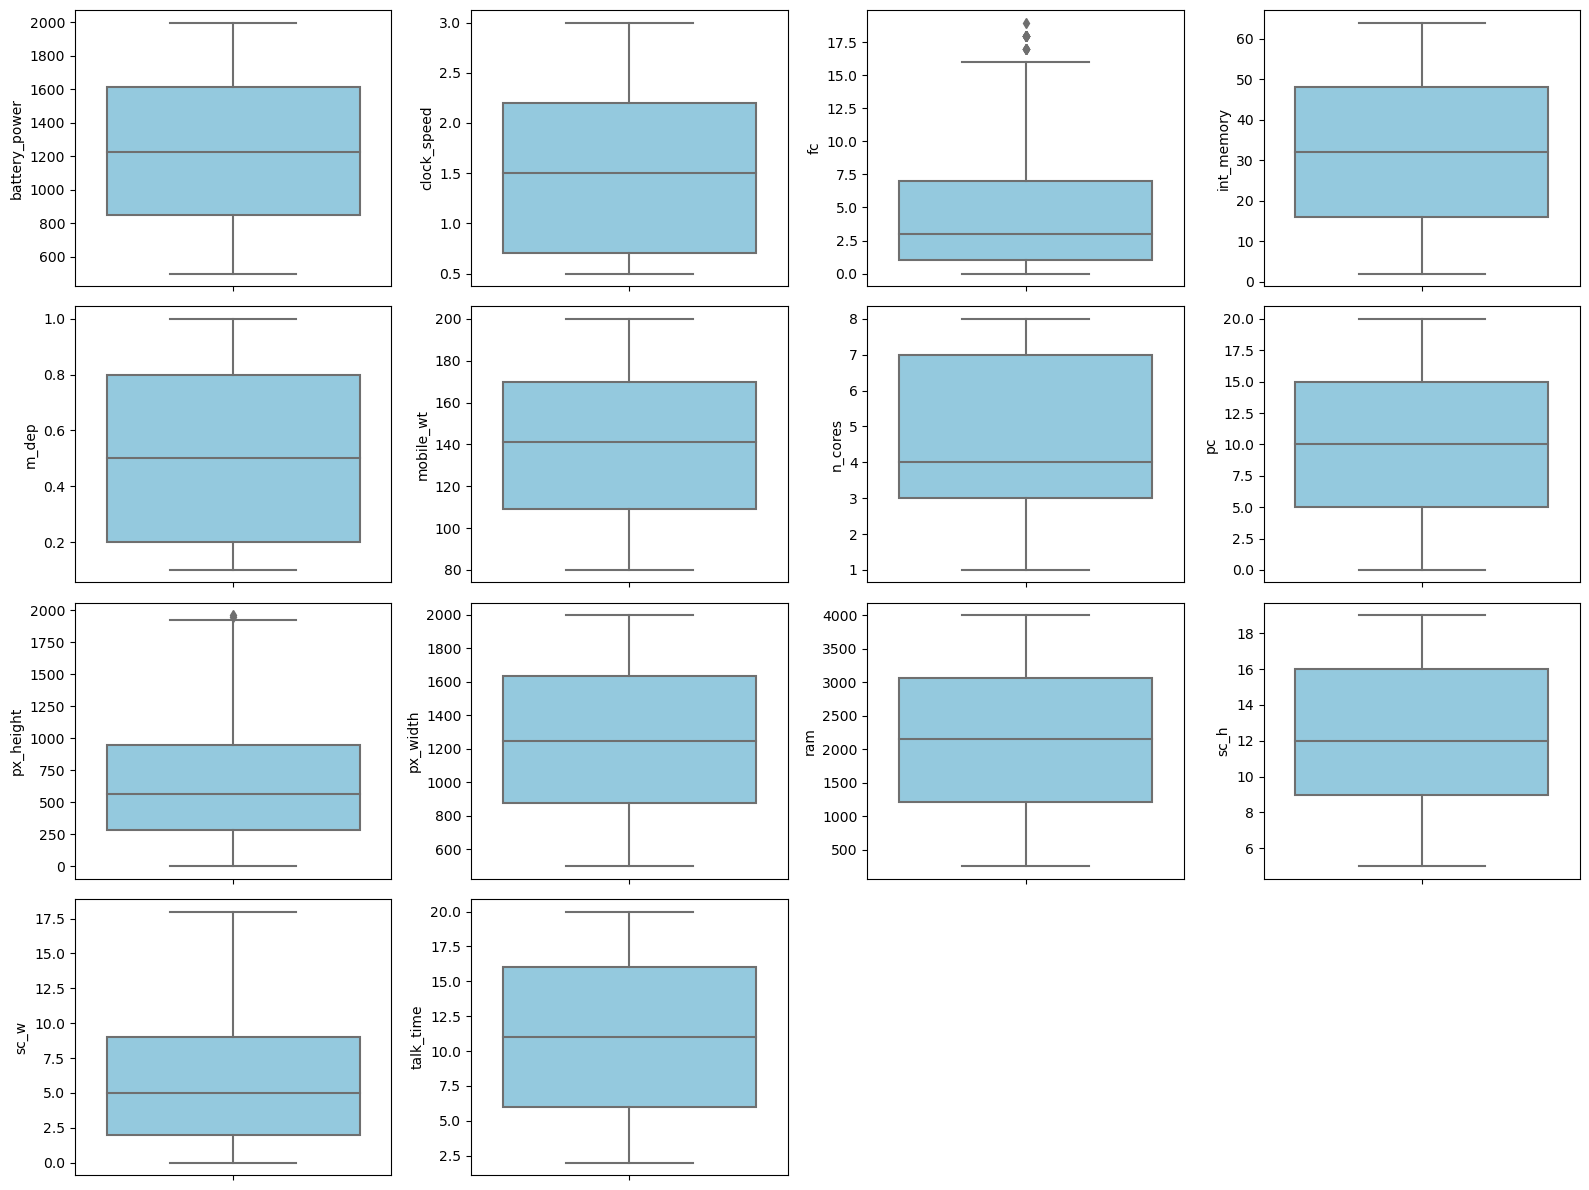

In [8]:
# Checking for any abnormal instances
# Select numerical columns
numerical_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 
                     'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Creating boxplots
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_clean[column], color='skyblue')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [14]:
# Define condition to remove rows with 'fc' values greater than 15.5 and 'px_height' values greater than 1850
combined_condition = (data_clean['fc'] <= 15.5) & (data_clean['px_height'] <= 1850)

# Apply condition to filter out rows
cleaned_data = data_clean[combined_condition]

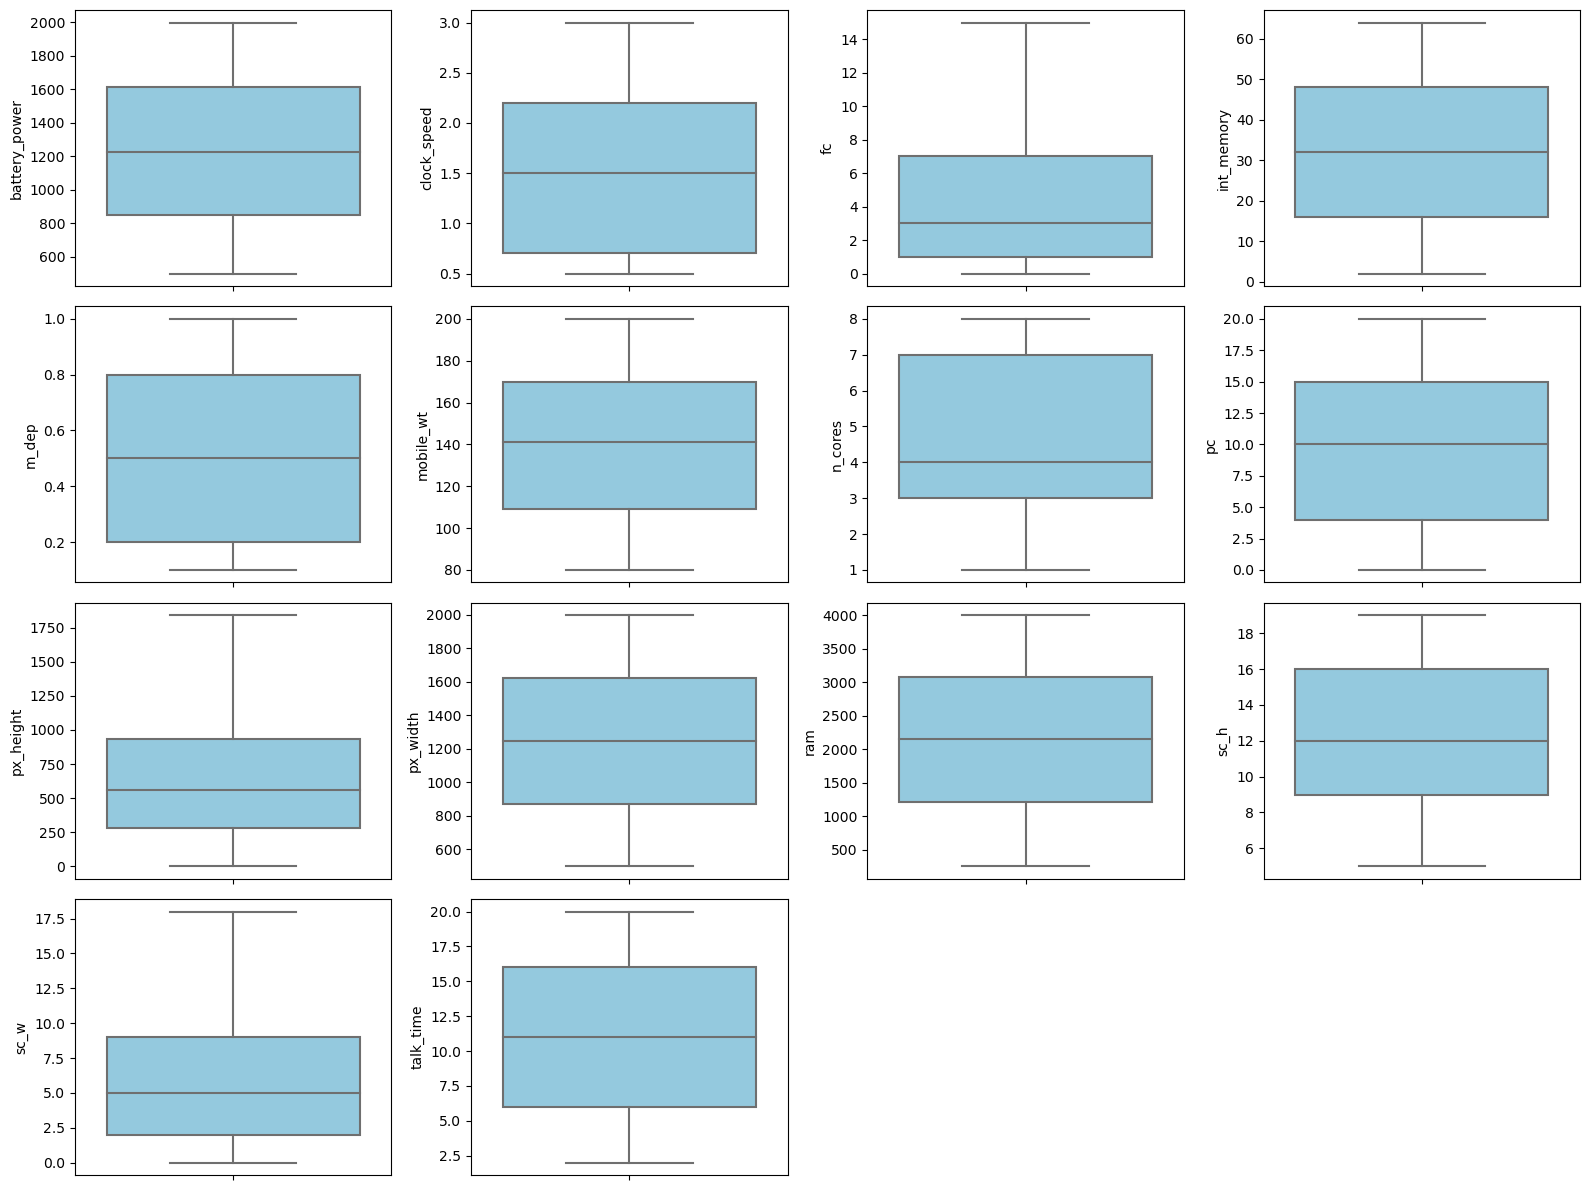

In [15]:
# Checking for any abnormal instances again
# Select numerical columns
numerical_columns = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 
                     'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Creating boxplots
plt.figure(figsize=(16, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=cleaned_data[column], color='skyblue')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# Correlation:
To study the correlation between **price range** and other features, we can calculate the correlation coefficient (Pearson correlation) between **price range** and each numerical feature in the dataset using the **corr** function. Then, we can select the variables that have a significant correlation with 'price range' and selected the variables whose correlation cofficient was greater than 0.1.

The selected features, including RAM, battery power, pixel width, and pixel height, are considered helpful because these features capture important hardware specifications and characteristics of mobile phones that are known to influence consumer preferences and purchasing decisions. Therefore, including these features in predictive models for price range estimation can help capture relevant information and improve the accuracy of the predictions.


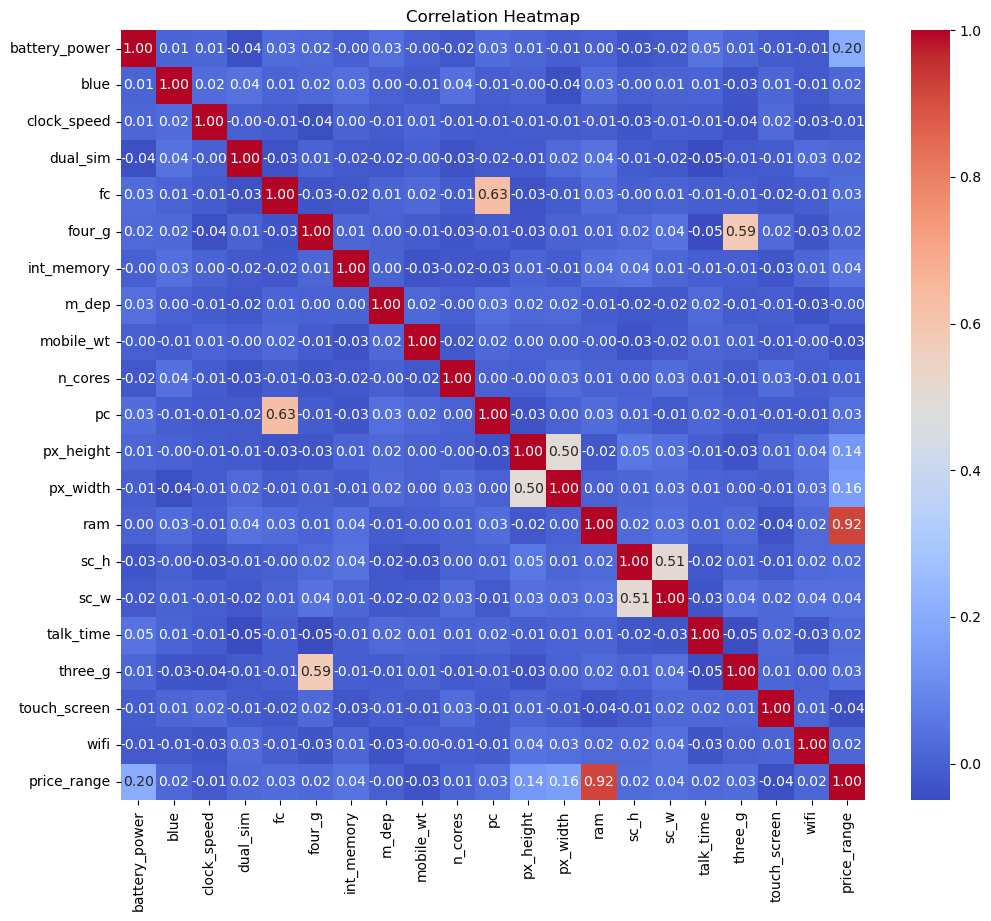

Selected features:
['price_range', 'ram', 'battery_power', 'px_width', 'px_height']


In [36]:
#Calculate correlation matrix
correlation_matrix = cleaned_data.corr()
#Plotting a heat map for visual representation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
#Choosing those with high absolute correlation to PriceRange
correlation_with_price_range = correlation_matrix['price_range'].abs().sort_values(ascending=False)
selected_features = correlation_with_price_range[correlation_with_price_range > 0.1].index.tolist()
#Display selected features
print("Selected features:")
print(selected_features)

# Dataset Spliting:
We splited the data set in the ratio of ratio of 8:2 (80% training and 20% testing).The **random_state** parameter is used to ensure reproducibility of the split.

In [38]:
# Selecting only the features and target variable from the dataset
X = cleaned_data[selected_features]  # Selected features
y = cleaned_data['price_range']  # Target variable

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirming the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (1553, 5) (1553,)
Test set shape: (389, 5) (389,)


# Logistic Regression Model:

The logistic regression model achieves a high **training accuracy of 95.56%**  and an even higher  **test accuracy of 97.17%**. This indicates that the model performs exceptionally well in both learning from the training data and generalizing to unseen data.

**Model Explanation**
* The **logistic regression model** uses a sigmoid function to predict the probability of each class (price range category) based on the input features. It learns the relationship between the selected features and the target variable by minimizing the logistic loss function.

* The selected features were chosen based on their significant correlation with the target variable. These features are believed to have a strong influence on the price range of mobile phones, as discussed earlier.

**Model Performance Evaluation:**

* The model demonstrates high accuracy on both the training and test sets, indicating its effectiveness in generalizing to unseen data.
* Factors contributing to the good performance may include the relevance of the selected features in predicting the 'price range' of mobile phones. These features are likely to have a strong influence on the price of a mobile phone, as they represent important hardware specifications.
* The high training accuracy suggests that the model has successfully learned from the training data and captured the underlying patterns in the features.
* The slightly higher test accuracy compared to the training accuracy suggests that the model is not overfitting and is generalizing well to unseen data.





In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Selecting significant features
selected_features = ['ram', 'battery_power', 'px_width', 'px_height']

# Splitting the dataset into features (X) and target variable (y)
X_train = train_data[selected_features]
y_train = train_data['price_range']
X_test = test_data[selected_features]
y_test = test_data['price_range']

# Training the logistic regression model
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(X_train, y_train)

# Predictions on training set
train_preds = logistic_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
print("Training Accuracy (Logistic Regression):", train_accuracy)

# Predictions on test set
test_preds = logistic_reg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
print("Test Accuracy (Logistic Regression):", test_accuracy)


Training Accuracy (Logistic Regression): 0.9555698647778493
Test Accuracy (Logistic Regression): 0.9717223650385605


# KNN model:

The KNN model is trained to predict the 'price range' based on the selected features. With an ad-hoc value of K=5, the model achieves accuracy scores on both the training and test sets.
With a **training accuracy** of approximately **94.78%** and a **test accuracy** of approximately **92.54%**, the KNN model demonstrates strong performance on both the training and test sets.

This indicates the model's proficiency in classifying mobile phones into price categories based on their hardware specifications.The model's performance is robust, as evidenced by the minimal difference between the training and test accuracies, suggesting that the model generalizes well to unseen data.



In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize and train KNN model with an ad-hoc value of K
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set K to 5 for example
knn_model.fit(X_train, y_train)

# Predictions on training set
train_preds_knn = knn_model.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, train_preds_knn)
print("Training Accuracy (KNN):", train_accuracy_knn)

# Predictions on test set
test_preds_knn = knn_model.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, test_preds_knn)
print("Test Accuracy (KNN):", test_accuracy_knn)

Training Accuracy (KNN): 0.9478428847392144
Test Accuracy (KNN): 0.9254498714652957


# GridsearchCV:

To **tune the hyper-parameter K** in KNN, we can utilize **GridSearchCV**, which exhaustively searches for the optimal K value from a predefined range of values.
This code utilizes GridSearchCV to find the best K value for a KNN model trained on the selected features ('battery_power', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w'). It searches for **K values** ranging from **1 to 20**, evaluates their performance using **5-fold cross-validation**, and plots the mean accuracy scores. Finally, it prints the best K value and its corresponding mean test score, aiding in selecting the optimal K for the model.


The **best K value** found by GridSearchCV is **13**, with a corresponding **mean test score** of approximately **93.11%**. This indicates that the KNN model achieves its highest accuracy when considering 13 nearest neighbors during classification. This means that, among the range of K values tested (1 to 20), K=13 yielded the most accurate predictions on unseen data. The mean test score of approximately 93.11% signifies the proportion of correct predictions made by the model when evaluated on the test set, highlighting its effectiveness in classifying mobile phone price ranges based on the selected features.


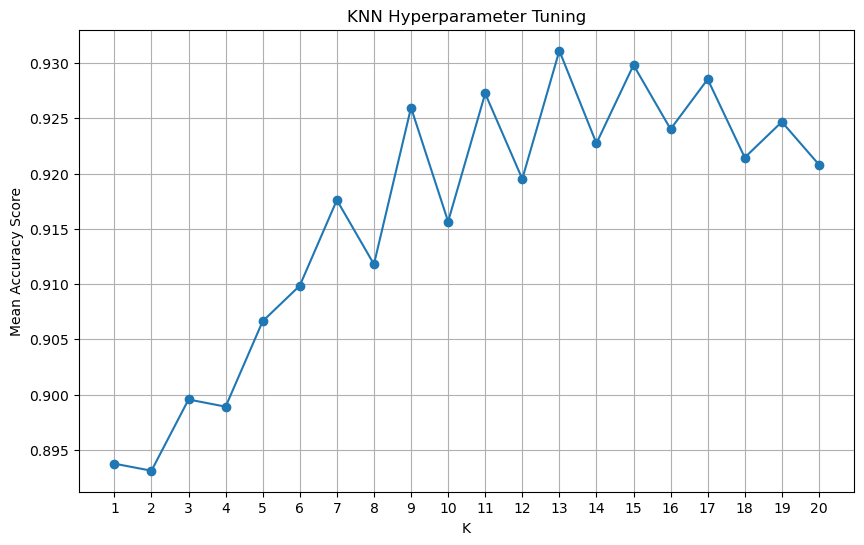

Best K: 13
Best Mean Test Score: 0.931102582719635


In [44]:
from sklearn.model_selection import GridSearchCV
# Define a range of K values to search over
param_grid = {'n_neighbors': np.arange(1, 21)}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV to find the best K value
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Extract results of GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Plot results on a line graph
plt.figure(figsize=(10, 6))
plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
plt.title('KNN Hyperparameter Tuning')
plt.xlabel('K')
plt.ylabel('Mean Accuracy Score')
plt.xticks(np.arange(1, 21))
plt.grid(True)
plt.show()

# Print the best K value and corresponding mean test score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_
print("Best K:", best_k)
print("Best Mean Test Score:", best_score)
